In [1]:
import scanpy as sc, pandas as pd, numpy as np,scanpy.external as sce,copy

In [155]:
abm= sc.read_h5ad('./220516-ABM.h5ad')
fl = sc.read_h5ad('./220516-FL.h5ad')

In [156]:
auc_abm = pd.read_csv('/home/csj/mywork/ilc/220517-pyscenic-grn/auc_abm.csv',index_col=0)
auc_fl  = pd.read_csv('/home/csj/mywork/ilc/220517-pyscenic-grn/auc_fl.csv',index_col=0)

bin_abm = pd.read_csv('/home/csj/mywork/ilc/220517-pyscenic-grn/bin_abm.csv',index_col=0)
bin_fl  = pd.read_csv('/home/csj/mywork/ilc/220517-pyscenic-grn/bin_fl.csv',index_col=0)

def rename_cols(df):
    df.columns =  [reg.split("(+)")[0] for reg in df.columns]

rename_cols(auc_abm)
rename_cols(auc_fl)
rename_cols(bin_abm)
rename_cols(bin_fl)

In [157]:
def add_regulon_layer(adata, regulon_auc_mat, layer_name):
    adata.var['is_regulon_hub'] = False
    adata.var.loc[regulon_auc_mat.columns,'is_regulon_hub'] = True
    new_auc_mat = pd.concat(objs=[regulon_auc_mat,
       pd.DataFrame(0.0, index=adata.obs.index, columns=np.setdiff1d(adata.var.index, regulon_auc_mat.columns)),
      ],axis=1)[adata.var.index]
    import copy
    adata.layers[layer_name]= copy.copy(new_auc_mat.copy())

In [158]:
add_regulon_layer(abm, auc_abm, layer_name='pyscenic_auc')
add_regulon_layer(abm, bin_abm, layer_name='pyscenic_bin')

add_regulon_layer(fl, auc_fl, layer_name='pyscenic_auc')
add_regulon_layer(fl, bin_fl, layer_name='pyscenic_bin')

/home/csj/anaconda3/envs/r411py37/lib/python3.7/site-packages/anndata/utils.py:141: UserWarning: Layer 'pyscenic_bin' converted to numpy array with dtype float64
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")


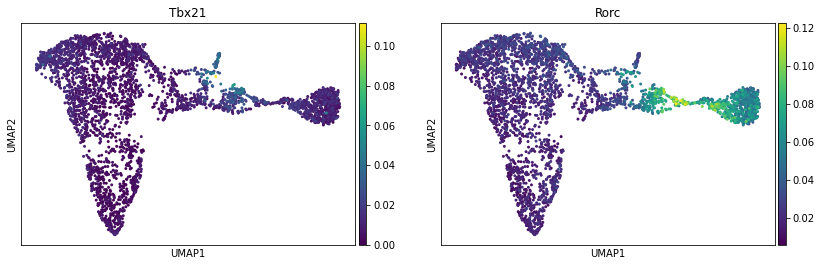

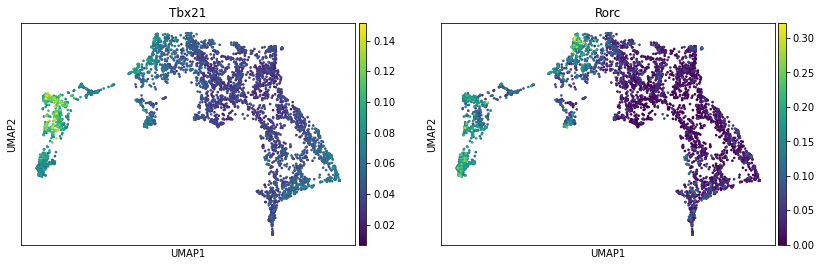

In [160]:
sc.pl.umap(abm,color=['Tbx21','Rorc'],layer='pyscenic_auc')
sc.pl.umap(fl, color=['Tbx21','Rorc'],layer='pyscenic_auc')

In [163]:
abm.X = copy.copy(abm.layers['normalized'].copy())
fl.X = copy.copy(fl.layers['normalized'].copy())

In [ ]:
abm.write_h5ad('./220516-ABM.h5ad')
fl.write_h5ad('./220516-FL.h5ad')

In [2]:
abm= sc.read_h5ad('./220516-ABM.h5ad')
fl = sc.read_h5ad('./220516-FL.h5ad')

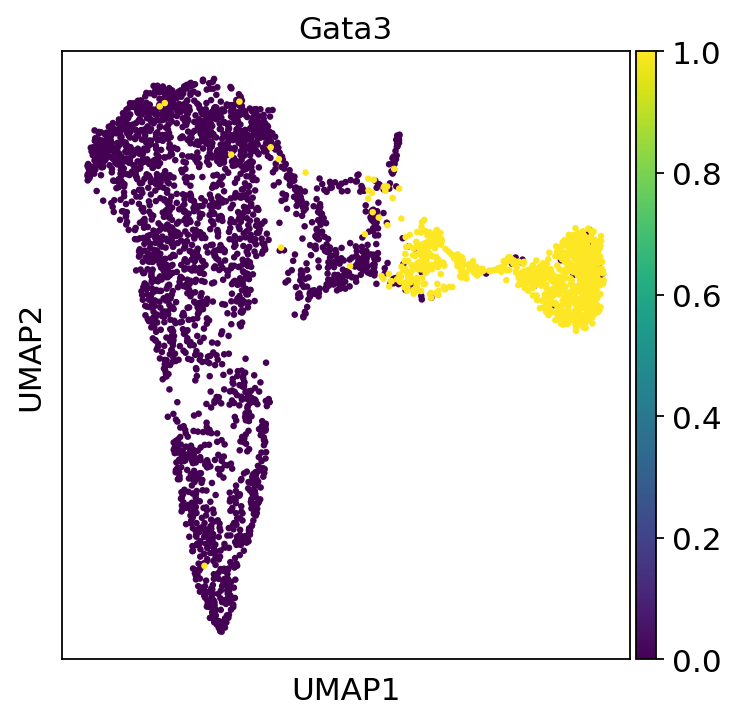

In [3]:
sc.set_figure_params(figsize=[5,5])
sc.pl.umap(abm, color='Gata3', layer='pyscenic_bin')

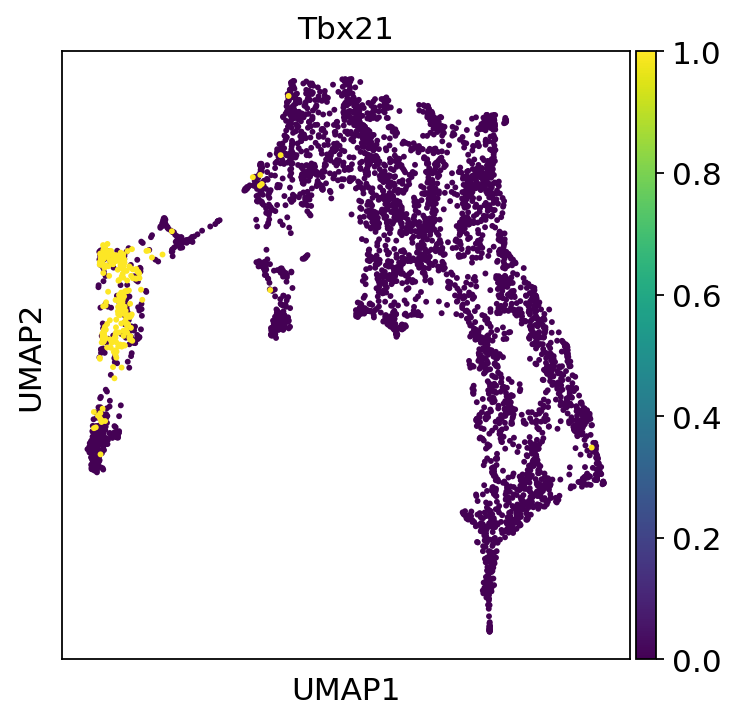

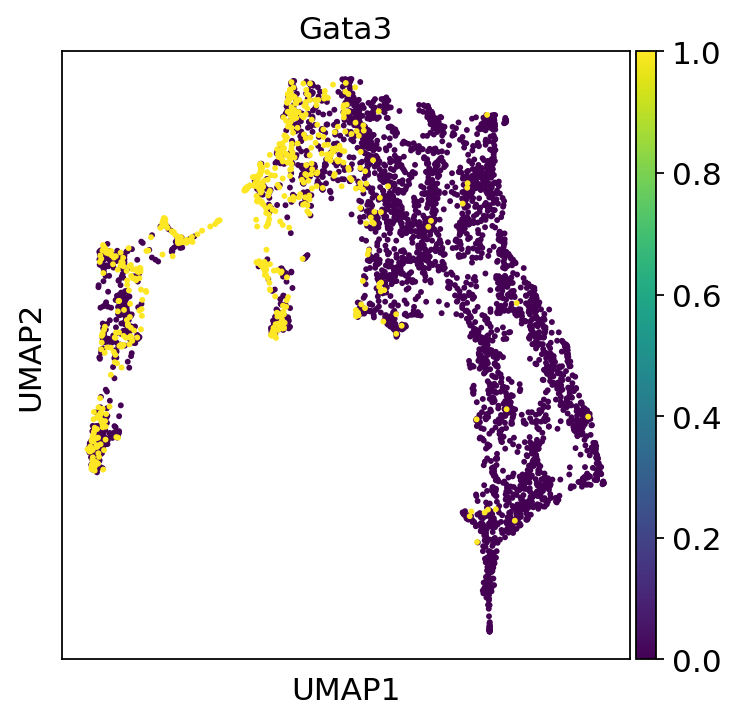

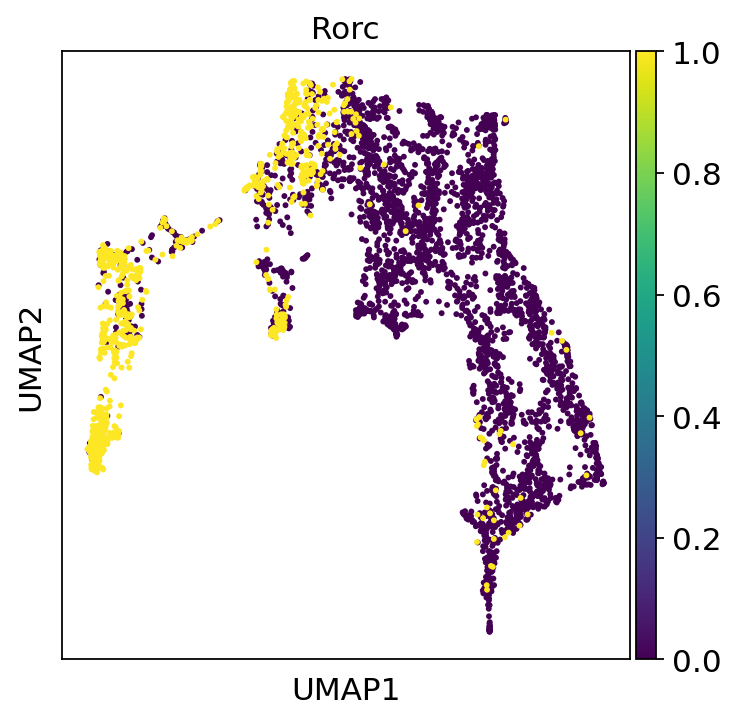

In [5]:
sc.pl.umap(fl, color='Tbx21', layer='pyscenic_bin')
sc.pl.umap(fl, color='Gata3', layer='pyscenic_bin')
sc.pl.umap(fl, color='Rorc', layer='pyscenic_bin')